In [1]:
# lv2look version: 28.10.2016


# Reading file p5642: 24-bit File has 316142604 bytes of data, 6079659 recs, 13 chans
# First recs are:
#         time, ch2, ch3, ch4, ch5, ch6, ch7, ch8, ch9, ch10, ch11, ch12, ch13
#         10000, -304528, -9174341, 1543109, -829384, 2880318, -218052, 3959970, -141076, -3184650, -511290, 1862222, 2764253  

# Experiment p5642               began at 9:28 AM  on 2/15/18 
# n_chans = 13, nrecs = 6079659
# Channel 2 (Vert DCDT   ) was recorded at +/- 10.0 volts
# Channel 3 (Vert LOAD   ) was recorded at +/- 10.0 volts
# Channel 4 (Hor DCDT    ) was recorded at +/- 10.0 volts
# Channel 5 (Hor LOAD    ) was recorded at +/- 10.0 volts
# Channel 6 (Pc Disp     ) was recorded at +/- 10.0 volts
# Channel 7 (Pc LOAD     ) was recorded at +/- 10.0 volts
# Channel 8 (Ppa Disp    ) was recorded at +/- 10.0 volts
# Channel 9 (Ppa LOAD    ) was recorded at +/- 10.0 volts
# Channel 10 (Ppb Disp    ) was recorded at +/- 10.0 volts
# Channel 11 (Ppb LOAD    ) was recorded at +/- 10.0 volts
# Channel 12 (Int DCDT    ) was recorded at +/- 10.0 volts
# Channel 13 (Sync        ) was recorded at +/- 10.0 volts

In [2]:
from pathlib import Path
from pylook.units import units
import pylook.calc as lc
from pylook.io import read_binary
import pylook_extra as lc2
import pylook_plotting_v4 as pl
import numpy as np
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
data = lc2.readHDF("p5642_py.h5")

In [4]:
data['Time'] = np.cumsum(data['Time']/1e4)
data['time'] = data.pop('Time')

data['norm disp'] = data.pop('Hor DCDT')
data['norm stress'] = data.pop('Hor LOAD')
data['pc disp'] = data.pop('Pc Disp')
data['pc press'] = data.pop('Pc LOAD')
data['ppa disp'] = data.pop('Ppa Disp')
data['ppa press'] = data.pop('Ppa LOAD')
data['ppb press'] = data.pop('Ppb LOAD')
data['ppb disp'] = data.pop('Ppb Disp')
data['int disp'] = data.pop('Int DCDT')

In [5]:
# CALIBRATIONS FOR DISPLACEMENTS AND STRESSES
#---------------------------------------------------------------------------------------

# HORIZONTAL DISPLACEMENT
# high gain, short rod: 0.657956387503886 mm/V
h_disp_calib = (20/2**24)  * 0.657956387503886 * 1000 #um/mm 
data['norm disp'] = data['norm disp'] * h_disp_calib

# HORIZONTAL INTERNAL DISPLACEMENT
# high gain: 0.415958632711548 mm/V
Hint_disp_calib = (20/2**24)  * 0.415958632711548 * 1000 #um/mm 
data['int disp'] = data['int disp'] * Hint_disp_calib

# HORIZONTAL LOAD
# high gain: 129.9546436 mV/kN
# 1 surface
# area: 0.0022231311 m^2
h_load_calib = 1 * 0.0022292545 * 129.9546436 * (2**24/20)
data['norm stress'] = data['norm stress'] * 1/h_load_calib

#---------------------------------------------------------------------------------------

# Pc INTENSIFIER DISPLACEMNT
# high gain: 29.49852507 mm/V 
# ((20/2**24) * units('V / bit')) * (29.499 * units('mm / V') * 1000 * units('micron / mm'))
pc_disp_calib = (20/2**24) * 29.49852507 * 1000 #um/mm
data['pc disp'] = data['pc disp'] * pc_disp_calib

# Pc PRESSURE
# high gain: 0.14556041 V/MPa
pc_pres_calib = (20/2**24)  * 1/0.14556041
data['pc press'] = data['pc press'] * pc_pres_calib

#---------------------------------------------------------------------------------------
                                                     
# PpA INTENSIFIER DISPLACEMNT
# high gain: 26.73796791 mm/V 
ppa_disp_calib = (20/2**24) * 26.73796791 * 1000 #um/mm
data['ppa disp'] = data['ppa disp'] * ppa_disp_calib

# PpA PRESSURE
# high gain: 1.517680983 V/MPa
ppa_pres_calib = (20/2**24) * 1/1.517680983
data['ppa press'] = data['ppa press'] * ppa_pres_calib
                               
#---------------------------------------------------------------------------------------
                                                      
# PpB INTENSIFIER DISPLACEMNT
# high gain: 26.88172043 mm/V 
ppb_disp_calib = (20/2**24) * 26.88172043 * 1000 #um/mm
data['ppb disp'] = data['ppb disp'] * ppb_disp_calib

# PpB PRESSURE
# high gain: 1.48 V/MPa
ppb_pres_calib = (20/2**24) * 1/1.483019428
data['ppb press'] = data['ppb press'] * ppb_pres_calib
                                                      
#---------------------------------------------------------------------------------------                                                      

In [6]:
runIdx = np.array([[12628, 94656], [109698, 933488], [937136, 1767281], [1769866, 2595911], [2601829, 3430670], [3432536, 4260365], [4316360, 5151646], [5237858, 6073430]])

In [7]:
# OFFSETS AND ZERO POINTS

# HOR DISP
data['norm disp'] = lc.zero(data['norm disp'], 2296, mode='before')

# INT HOR DISP
data['int disp'] = -1 * lc.zero(data['int disp'], 2303, mode='before')
# data['int disp'] = lc.remove_offset(data['int disp'], 1958, 1964, set_between=True)

# HOR LOAD
data['norm stress'] = lc.zero(data['norm stress'], 2303, mode='before')

# PC DISP
data['pc disp'] = lc.zero(data['pc disp'], 2581, mode='before')

# PC LOAD
data['pc press'] = lc.zero(data['pc press'], 2582, mode='before')

# Ppa LOAD
data['ppa press'] = lc.zero(data['ppa press'], 4476, mode='before')

# Ppb LOAD
data['ppb press'] = lc.zero(data['ppb press'], 4410, mode='before')


In [8]:
# %matplotlib widget
# pl('int disp', 'ppb press')

In [9]:
##################################################################################
# cjm & cew; updated for True Triax config. 20181031                             #
#                                                                                #
#                                                                                #
#   In the vessel for SDS with notched L-shaped samples:                         #
#               Shear Stress is given by: tau = (FVp - Pc*Ap)/A                  #
#               Normal stress is given by: sigma_n = (FHp + Pc(A-Ap))/A          #
#                    or, sigma_n = FHp/A + Pc(A-Ap)/A                            #
#  where:                                                                        #
#  FVp is vertical force applied by the piston                                   #
#  FHp is horizontal force applied by the piston                                 #
#  A is the smaller area of the L-shaped samples                                 #
#   note that the frictional contact area will be given by the block thickness.  #
#  The eventual fracture plane will be given by the distance between the notches #
#  Ap is the area of the piston                                                  #
#  Pc is the confining pressure                                                  #
#                                                                                #
##################################################################################


# Account for Pc Force pushing on pistons
# Horizontal Area = 0.0022292545 m^2
A = 0.0022231311
#adjust normal stress for Pc.
#Area of piston, Ap = 44mm (dia) =  0.00152053084 m^2
Ap = 0.044 * np.pi
Pc_area = 100 - (Ap-A)/A
# ~ 32% of Pc is added to the applied horizontal stress to get the effective stress

# Calculate Effective Stresses
data['effNS'] = data['norm stress'] + (data['pc press'] * Pc_area/100) - (data['ppa press'] + data['ppb press'])/2

In [10]:
data['ppb press filt'] = lc2.butter_filter(data['ppb press'], 5, 1000, 3, 'low')
data['ppa press filt'] = lc2.butter_filter(data['ppa press'], 5, 1000, 3, 'low')


data['ppb disp filt'] = lc2.butter_filter(data['ppb disp'], 2, 1000, 3, 'low')
data['ppa disp filt'] = lc2.butter_filter(data['ppa disp'], 2, 1000, 3, 'low')

###############################################################################
# VOLUMETRIC FLOW                                                             #
# first, calculate displacement rate of the pistons with running avg. slope   #
# then, multiply by inner diameter of intensifiers for volumetric rate        #
###############################################################################

# sampfreq = 1000;

# idxfs100only = np.where(np.logical_and(sampfreq > 90, sampfreq < 110))

# data['PpDiff'][idxfs100only];

###############################################################################

# calculate Pressure differential & convert from [MPa] --> [Pa]
data['PpDiff'] = (data['ppb press'] - data['ppa press']) * 1e6 #Pa
data['PpDiff filt'] = (data['ppb press filt'] - data['ppa press filt']) * 1e6 #Pa

data['mmPpDiff'] = lc2.movingmean(data['PpDiff'],1001)
data['mmPpDiff filt'] = lc2.movingmean(data['PpDiff filt'],1001)

# INTENSIFIER DISPLACEMENT RATES
data['AvPparate'] = lc2.movingslope(-1*data['ppa disp'], 1001)
data['AvPpbrate'] = lc2.movingslope(-1*data['ppb disp'], 1001)
data['AvPparate filt'] = lc2.movingslope(-1*data['ppa disp filt'], 1001)
data['AvPpbrate filt'] = lc2.movingslope(-1*data['ppb disp filt'], 1001)

# INTENSIFIER VOLUME
piston_dia = 0.0254 #meter
Vol_int = np.pi*(piston_dia/2)**2 #m^2

# FLOW RATES
data['Qa'] = -1 * data['AvPparate']/1e6 * Vol_int #m^3/s
data['Qb'] = data['AvPpbrate']/1e6 * Vol_int #m^3/s
data['Qa filt'] = -1 * data['AvPparate filt']/1e6 * Vol_int #m^3/s
data['Qb filt'] = data['AvPpbrate filt']/1e6 * Vol_int #m^3/s

#flow in this exp is from to A to B
#check to make sure we have steady-state flow -- percent difference 
data['QpctDiff'] = (data['Qa'] - data['Qb']) / data['Qa'] * 100 #percent
data['QpctDiff filt'] = (data['Qa filt'] - data['Qb filt']) / data['Qa filt'] * 100 #percent

#calculate an average flow rate from upsteam and downstream
data['Qavg'] = (data['Qa'] + data['Qb'])/2 #m^3/s
data['Qavg filt'] = (data['Qa filt'] + data['Qb filt'])/2 #m^3/s

# Fracture plane length x thickness 45 x 23.43 = 0.00105435 m^2
A_flow = 0.045 * 0.02343 #m^2

# flow length is 0.04976 m
L_flow = 0.04976 #meter

#viscosity of water at 25 deg. C = 1e-3 Pa.s
nu = 1e-3 #Pa.s

# permeability calculation [m^2]
data['perm'] = (data['Qavg'] * nu * L_flow)/(data['mmPpDiff'] * A_flow) #[m^2]
data['perm filt'] = (data['Qavg filt'] * nu * L_flow)/(data['mmPpDiff filt'] * A_flow) #[m^2]

In [11]:
# %matplotlib widget
# pl.plotfr(data, "time", "ppa disp", Fs = 1000, idx1=0, idx2=-1)

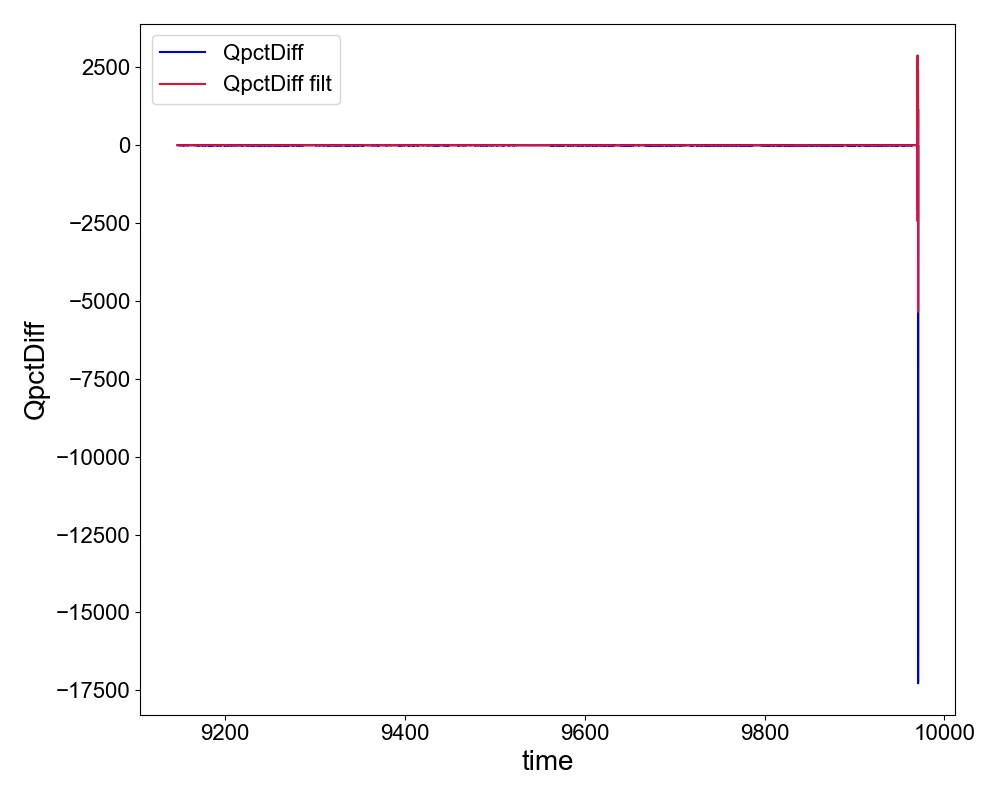

In [12]:
%matplotlib widget
pl.plotter(data, x="time", y='QpctDiff', y2='QpctDiff filt', y2log=False, idx1=109743, idx2=933443, dec=2, plot_type="sharey")

In [13]:
# %matplotlib widget
# pl.plotter(data, x="time", y='norm stress', y2='perm', y2log=False, idx1=109743, idx2=933443, plot_type="sub2")

In [14]:
# %matplotlib widget
# pl.plotter(data, "time", 'norm stress', 'perm', y2log=False, idx1=0, idx2=-1, plot_type="sub2")

In [15]:
# fig, axs = plt.subplots(1, 1, figsize=(12, 5))
# axs.plot(-1*data['Qa'], color='r')
# axs.plot(data['Qb_filt'], color='b')
# # axs.set_xscale('log')
# # axs.set_yscale('log')
# plt.show()

In [16]:
max_flow_diff_percent = 10
min_flow = 0e-12; # in m^3/s. Minimum flow

flow_diff_idxs = data['QpctDiff'].abs().to_numpy() > max_flow_diff_percent
flow_diff_idxs_filt = data['QpctDiff filt'].abs().to_numpy() > max_flow_diff_percent
min_flow_idxs = np.logical_or(data['Qa'].to_numpy() <= min_flow, data['Qb'].to_numpy() <= min_flow)

data['perm'].to_numpy()[flow_diff_idxs] = np.nan
data['perm filt'].to_numpy()[flow_diff_idxs_filt] = np.nan
# data['perm'].to_numpy()[min_flow_idxs] = np.nan

In [17]:
# %matplotlib widget
# fig, axs = plt.subplots(4, 1, figsize=(12, 10), dpi=100, sharex=True)
# axs[0].plot(data['time'][12000:-5000:10]/60, data['effNS'][12000:-5000:10], color='k', lw=1.5)
# axs[0].set_ylabel('$\sigma_{eff}$ (MPa)')

# axs[1].plot(data['time'][12000:-5000:10]/60, data['PpDiff'][12000:-5000:10]*1e-6, color='darkorange', lw=1.5)
# axs[1].set_ylabel('$\Delta P$ (MPa)')

# # axs[2].plot(data['time'][12000:-5000:10]/60, data['Qa'][12000:-5000:10], color='r', lw=2, label='outlet')
# # axs[2].plot(data['time'][12000:-5000:10]/60, data['Qb'][12000:-5000:10], color='b', lw=2, label='inlet')
# axs[2].plot(data['time'][12000:-5000:10]/60, data['int disp'][12000:-5000:10], color='darkgreen', lw=1.5)
# # axs[2].set_yscale('log')
# # axs[1].set_ylim([-0.0047, 0.01])
# # axs[2].set_ylabel('Flow Rate ($m^3/s$)')
# # axs[2].legend()
# axs[2].set_ylabel('Int. Disp. ($\mu m$)')

# axs[3].scatter(data['time'][12000:-5000:10]/60, data['perm'][12000:-5000:10]*1e18, c='darkblue', s=3)
# axs[3].set_ylim(2, 15)
# # axs[2].set_xlim([69.8, 77.5])
# # axs[3].set_yscale('log')
# axs[3].set_ylabel('Perm. $\cdot 10^{-18}$ ($m^2$)')
# axs[3].set_xlabel('Time (min)')
# plt.show()

In [18]:
runIdx[:,0]+=1000 
runIdx[:,1]-=1000 

In [19]:
# %matplotlib inline
# for aa in range(len(runIdx)):
#     fig, axs = plt.subplots(4, 1, figsize=(12, 10), dpi=200, sharex=True)
#     axs[0].plot(data['time'][runIdx[aa,0]:runIdx[aa,1]]/60, data['effNS'][runIdx[aa,0]:runIdx[aa,1]], color='k', lw=1.5)
#     axs[0].set_ylabel('$\sigma_{eff}$ (MPa)')

#     axs[1].plot(data['time'][runIdx[aa,0]:runIdx[aa,1]]/60, data['PpDiff'][runIdx[aa,0]:runIdx[aa,1]]*1e-6, color='darkorange', lw=1.5)
#     axs[1].set_ylabel('$\Delta P$ (MPa)')

#     # axs[2].plot(data['time'][runIdx[aa,0]:runIdx[aa,1]]/60, data['Qa'][runIdx[aa,0]:runIdx[aa,1]], color='r', lw=2, label='outlet')
#     # axs[2].plot(data['time'][runIdx[aa,0]:runIdx[aa,1]]/60, data['Qb'][runIdx[aa,0]:runIdx[aa,1]], color='b', lw=2, label='inlet')
#     axs[2].plot(data['time'][runIdx[aa,0]:runIdx[aa,1]]/60, data['int disp'][runIdx[aa,0]:runIdx[aa,1]], color='darkgreen', lw=1.5)
#     # axs[2].set_yscale('log')
#     # axs[1].set_ylim([-0.0047, 0.01])
#     # axs[2].set_ylabel('Flow Rate ($m^3/s$)')
#     # axs[2].legend()
#     axs[2].set_ylabel('Int. Disp. ($\mu m$)')

#     axs[3].scatter(data['time'][runIdx[aa,0]:runIdx[aa,1]]/60, data['perm'][runIdx[aa,0]:runIdx[aa,1]]*1e18, c='darkblue', s=3)
#     # axs[2].set_xlim([69.8, 77.5])
#     # axs[3].set_yscale('log')
#     axs[3].set_ylabel('Perm. $\cdot 10^{-18}$ ($m^2$)')
#     axs[3].set_xlabel('Time (min)')
#     plt.show()
#     fig.savefig('p5642_run'+str(aa)+'.png')

In [20]:
data.drop(['Vert DCDT', 'Vert LOAD', 'PpDiff','mmPpDiff','AvPparate','AvPpbrate','QpctDiff','Qavg','QpctDiff filt', 'Qavg filt', 'PpDiff filt', 'mmPpDiff filt', 'AvPparate filt', 'AvPpbrate filt'], axis=1, inplace=True)

In [21]:
with h5.File("p5642_r.hdf5", "w") as f:
    for chanName in data.keys():
        f.create_dataset(chanName, data=data[chanName])